In [ ]:
#my abasl
import os
import pandas as pd

# Set the path to the directory containing the CSV files
folder_path = "/kaggle/input/harthdataset"  # path to the file

# List all CSV files in the directory
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Initialize an empty DataFrame to store merged data
merged_data = pd.DataFrame()

# Loop through CSV files and append them to the merged DataFrame. 
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    merged_data = merged_data.append(data, ignore_index=True)

# Save the merged data to a new CSV file
merged_file_path = "/kaggle/working/merged_data.csv"  # Update this to the desired merged file path
merged_data.to_csv(merged_file_path, index=False)


/tmp/ipykernel_28/88957831.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/tmp/ipykernel_28/88957831.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/tmp/ipykernel_28/88957831.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/tmp/ipykernel_28/88957831.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
/tmp/ipykernel_28/88957831.py:17: FutureWarning: The frame.append method is deprecated and w

In [4]:
#Defining a new variable for the merged dataset
data = merged_data

# Summary Statistics 

In [5]:
# Display the first few rows of the dataset
print("First few rows:")
print(data.head())

# Display basic information about the dataset
print("\nDataset info:")
print(data.info())

# Display summary statistics of the dataset
print("\nSummary statistics:")
print(data.describe())

# Display the column names
print("\nColumn names:")
print(data.columns)

# Display the number of unique values in each column
print("\nNumber of unique values in each column:")
print(data.nunique())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check the data types of each column
print("\nData types:")
print(data.dtypes)


First few rows:
                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2019-01-12 00:00:00.000 -1.000000 -0.071289 -0.215332 -0.997070 -0.124268   
1  2019-01-12 00:00:00.020 -1.000000 -0.084473 -0.210449 -0.964844 -0.107422   
2  2019-01-12 00:00:00.040 -0.997559 -0.111328 -0.199219 -0.971191 -0.108887   
3  2019-01-12 00:00:00.060 -1.006592 -0.139160 -0.209717 -0.986084 -0.112061   
4  2019-01-12 00:00:00.080 -1.030029 -0.140137 -0.228760 -0.985840 -0.127441   

    thigh_z  label  index  Unnamed: 0  
0  0.142334      6    NaN         NaN  
1  0.160645      6    NaN         NaN  
2  0.170898      6    NaN         NaN  
3  0.154297      6    NaN         NaN  
4  0.155029      6    NaN         NaN  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   timestamp   object 
 1   back_x      float64
 2   back_y      float64
 3   back_

# Data Visualization 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_28/3879245509.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


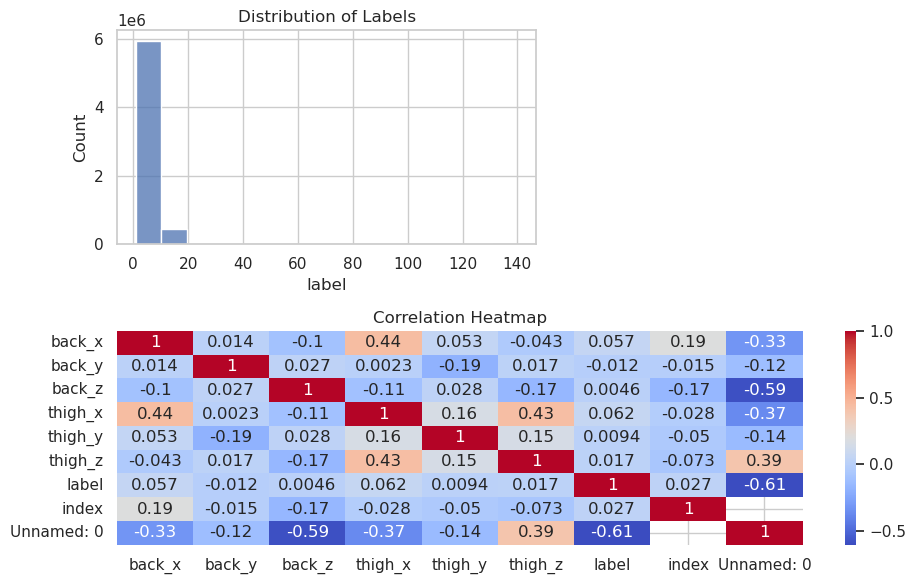

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Data visualization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Histogram of labels
plt.subplot(2, 2, 1)
sns.histplot(data['label'], bins=15, kde=False)
plt.title("Distribution of Labels")

# Pairplot
#plt.subplot(2, 2, 2)
#sns.pairplot(data, hue='label')
#plt.title("Pair Plot")

# Correlation heatmap
plt.subplot(2, 1, 2)
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()


In [1]:
# Get the list of feature columns (excluding non-numeric columns)
feature_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(feature_columns), ncols=1, figsize=(10, 6 * len(feature_columns)))

# Loop through feature columns and create visualizations
for i, feature in enumerate(feature_columns):
    ax = axes[i]

    # Create a histogram
    ax.hist(data[feature], bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

    # Add a bar chart
    if data[feature].nunique() <= 20:
        ax2 = ax.twinx()
        sns.countplot(x=feature, data=data, ax=ax2, palette='Set2', alpha=0.7)
        ax2.set_ylabel('Count')

    # Add a line plot
    ax3 = ax.twiny()
    sns.lineplot(x=range(len(data)), y=data[feature], ax=ax3, color='red', alpha=0.7)
    ax3.set_xlabel('Index')
    ax3.set_ylabel(f'{feature} (line)', color='red')

    # Set y-axis label color for the line plot
    ax3.tick_params(axis='y', labelcolor='red')
    ax3.spines['top'].set_color('red')
    ax3.spines['bottom'].set_color('red')

plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

In [7]:
# Display summary statistics of the dataset
print(data.describe())

             back_x        back_y        back_z       thigh_x       thigh_y  \
count  6.461328e+06  6.461328e+06  6.461328e+06  6.461328e+06  6.461328e+06   
mean  -8.849574e-01 -1.326128e-02 -1.693779e-01 -5.948883e-01  2.087665e-02   
std    3.775916e-01  2.311709e-01  3.647385e-01  6.263466e-01  3.884511e-01   
min   -8.000000e+00 -4.307617e+00 -6.574463e+00 -8.000000e+00 -7.997314e+00   
25%   -1.002393e+00 -8.312914e-02 -3.720700e-01 -9.742110e-01 -1.000873e-01   
50%   -9.748998e-01  2.593677e-03 -1.374510e-01 -4.217309e-01  3.262909e-02   
75%   -8.123032e-01  7.251000e-02  4.647321e-02 -1.678755e-01  1.549512e-01   
max    2.291708e+00  6.491943e+00  4.909483e+00  7.999756e+00  7.999756e+00   

            thigh_z         label          index     Unnamed: 0  
count  6.461328e+06  6.461328e+06  720639.000000  137646.000000  
mean   3.749160e-01  6.783833e+00  195407.155799   68822.500000  
std    7.360983e-01  1.143238e+01  111591.198157   39735.121914  
min   -8.000000e+00  1.0

# Random Sampling of Data

In [8]:
# Randomly sample 100,000 rows from the entire dataset
sample_size = 100000
if len(merged_data) > sample_size:
    data = merged_data.sample(n=sample_size, random_state=42)
else:
    data = merged_data.copy()

# Save the sampled dataset as a CSV file
data.to_csv('sampled_dataset.csv', index=False)
print("Randomly sampled dataset with 100,000 rows saved as 'sampled_dataset.csv'")

Randomly sampled dataset with 100,000 rows saved as 'sampled_dataset.csv'


In [9]:
# Check instances of missing values
missing_values = data.isnull().sum()
print("Instances of missing values:")
print(missing_values)

# Check uniqueness of each column
uniqueness = data.nunique()
print("\nUniqueness of each column:")
print(uniqueness)

Instances of missing values:
timestamp         0
back_x            0
back_y            0
back_z            0
thigh_x           0
thigh_y           0
thigh_z           0
label             0
index         88724
Unnamed: 0    97879
dtype: int64

Uniqueness of each column:
timestamp     94571
back_x        87847
back_y        84862
back_z        86216
thigh_x       89821
thigh_y       87562
thigh_z       89633
label            12
index         11188
Unnamed: 0     2121
dtype: int64


# Build and Train Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target labels (y)
X = data.drop(['label', 'timestamp', 'Unnamed: 0', 'index' ], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Build and train the models
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")


Random Forest - Accuracy: 0.8817
KNN - Accuracy: 0.8741
SVM - Accuracy: 0.8489
Logistic Regression - Accuracy: 0.6600


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Accuracy

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef, mean_absolute_error, mean_squared_error
import numpy as np
# Loop through models and evaluate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print("Confusion Matrix:\n", cm)
    print("="*50)


Random Forest Metrics:
Accuracy: 0.8815
Precision: 0.8713
Recall: 0.8815
F1-Score: 0.8663
MCC: 0.8393
Mean Absolute Error: 1.3691
Root Mean Squared Error: 10.4849
Confusion Matrix:
 [[ 4940    67   131     5     0   301    17     0   116     8     2     0]
 [  217  1153     2     0     2     1    10     2     7     3     0     0]
 [  464     2   208     2     1   416     8     1    31     3     7     0]
 [  243     7     9    19     0    16     1     0    51     1     4     0]
 [  268    19     1     1     7     7     0     0    13     2     1     0]
 [  255     2   121     0     0  3034    15     0    15     1     6     1]
 [   39     3     1     0     0     3 13392     0    15     0     1     0]
 [    2     3     0     0     0     0     2  1965     2     0     0     0]
 [  176     7     4     8     0    15    11     0  1562    20    32     0]
 [   71     3     2     0     0     7     1     0    78    87     3     1]
 [   19     0     4     0     0     9     3     0    98     4    65 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics:
Accuracy: 0.8489
Precision: 0.8073
Recall: 0.8489
F1-Score: 0.8228
MCC: 0.7968
Mean Absolute Error: 1.6380
Root Mean Squared Error: 11.0058
Confusion Matrix:
 [[ 4220    69     0     0     0  1111    47     2   126    12     0     0]
 [  260  1082     0     0     0     9    24     7    10     5     0     0]
 [  264     2     0     0     0   820    13     1    36     7     0     0]
 [  209     6     0     0     0    84     6     0    46     0     0     0]
 [  240    20     0     0     0    41     1     0    17     0     0     0]
 [   88     2     0     0     0  3246    28     0    70    16     0     0]
 [   29     0     0     0     0     7 13397     1    20     0     0     0]
 [    3     1     0     0     0     0     1  1967     2     0     0     0]
 [  236     4     0     0     0    56    44     0  1487     8     0     0]
 [   84     1     0     0     0    11     1     0    88    68     0     0]
 [   19     1     0     0     0    35     4     0   141     2     0     0]
 [ 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Selection (SelectKBest)

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# Specify the number of top features to select
k = 4

# Initialize the SelectKBest object with the ANOVA F-value score function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector on the training data and transform both training and test data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the F-value scores of the selected features
feature_scores = selector.scores_

# Create a list of tuples containing feature index and its corresponding score
feature_scores_list = [(i, score) for i, score in enumerate(feature_scores)]

# Sort the list in descending order based on scores
feature_scores_list.sort(key=lambda x: x[1], reverse=True)

# Print the ranked features
print("Ranked Features:")
for rank, (feature_index, score) in enumerate(feature_scores_list, start=1):
    print(f"Rank {rank}: Feature {feature_index}, Score: {score:.4f}")

Selected Feature Indices: [0 2 3 5]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Specify the number of top features to select
k = 4

# Initialize the SelectKBest object with the ANOVA F-value score function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector on the training data and transform both training and test data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Selected Feature Indices:", selected_indices)

In [26]:
# Get the F-value scores of the selected features
feature_scores = selector.scores_

# Create a list of tuples containing feature index and its corresponding score
feature_scores_list = [(i, score) for i, score in enumerate(feature_scores)]

# Sort the list in descending order based on scores
feature_scores_list.sort(key=lambda x: x[1], reverse=True)

# Print the ranked features along with their indices
print("Ranked Features:")
for rank, (feature_index, score) in enumerate(feature_scores_list, start=1):
    if feature_index in selected_indices:
        selected_index = selected_indices.tolist().index(feature_index)
        print(f"Rank {rank}: Feature {feature_index}, Score: {score:.4f}, Index: {selected_index}")

Ranked Features:

Rank 1: Feature 2, Score: 7524.6803, Index: 1

Rank 2: Feature 0, Score: 1731.7090, Index: 0

Rank 3: Feature 3, Score: 1495.1017, Index: 2

Rank 4: Feature 5, Score: 1195.5220, Index: 3


# Build and Train Model (SelectKBest)

In [27]:
# Build and train the models
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
}

for model_name, model in models.items():
    model.fit(X_train_selected, y_train)  # Use the selected features X_train_selected
    y_pred = model.predict(X_test_selected)  # Use the selected features X_test_selected
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

Random Forest - Accuracy: 0.9740

KNN - Accuracy: 0.9727

SVM - Accuracy: 0.9592

Logistic Regression - Accuracy: 0.9199


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# Specify the number of top features to select
k = 4

# Initialize the SelectKBest object with the ANOVA F-value score function
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector on the training data and transform both training and test data
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the selected feature indices
print("Selected Feature Indices:", selected_indices)

In [ ]:
from sklearn.metrics import confusion_matrix
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Walking', 'Running', 'Shuffling', 'stairs(Accending)', 'stairs(descending)', 'standing', 'sitting', 'lying', 'cycling(sit)', 'cycling(stand)', 'cycling(sit, inactive)', 'cycling(stand, inactive)']
                , yticklabels=['Walking', 'Running', 'Shuffling', 'stairs(Accending)', 'stairs(descending)', 'standing', 'sitting', 'lying', 'cycling(sit)', 'cycling(stand)', 'cycling(sit, inactive)', 'cycling(stand, inactive)'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("--------------------------")

In [ ]:
from sklearn.metrics import confusion_matrix
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Walking', 'Running', 'Shuffling', 'stairs(Accending)', 'stairs(descending)', 'standing', 'sitting', 'lying', 'cycling(sit)', 'cycling(stand)', 'cycling(sit, inactive)', 'cycling(stand, inactive)'],
                yticklabels=['Walking', 'Running', 'Shuffling', 'stairs(Accending)', 'stairs(descending)', 'standing', 'sitting', 'lying', 'cycling(sit)', 'cycling(stand)', 'cycling(sit, inactive)', 'cycling(stand, inactive)'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("--------------------------")

# Feature Selection (PRINCIPAL COMPONENT ANALYSIS)

In [ ]:
# Loop through models and evaluate metrics
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mcc = matthews_corrcoef(y_test, y_pred)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print("Confusion Matrix:\n", cm)
    print("="*50)